In [2]:
import numpy as np # for linear algebra
import pandas as pd # for data manipulation
from sklearn.preprocessing import StandardScaler, LabelEncoder # for scaling data and encoding respectively
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
from sklearn.model_selection import train_test_split # for splitting data set
from sklearn.linear_model import LogisticRegression # machine learning model used
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # model evaluation metrics

In [3]:
df = pd.read_csv('Iris.csv') # read the data from the CSV file

### Exploratory Data Analysis

In [4]:
df.head() # displays rows from the top of the dataframe

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.isnull().sum() # mark null values as True and returns sum of number of True values in each column

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.duplicated().sum() # shows number of duplicated entries in the dataframe

0

In [7]:
df.describe().round(2) # calculates statistical values and rounds them to 2 decimal places

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00,150.00
mean,75.50,5.84,3.05,3.76,1.20
std,43.45,0.83,0.43,1.76,0.76
min,1.00,4.30,2.00,1.00,0.10
25%,38.25,5.10,2.80,1.60,0.30
50%,75.50,5.80,3.00,4.35,1.30
75%,112.75,6.40,3.30,5.10,1.80
max,150.00,7.90,4.40,6.90,2.50


In [8]:
df.sample(8) # Shows any random 8 columns (default is 5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
137,138,6.4,3.1,5.5,1.8,Iris-virginica
39,40,5.1,3.4,1.5,0.2,Iris-setosa
147,148,6.5,3.0,5.2,2.0,Iris-virginica
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
143,144,6.8,3.2,5.9,2.3,Iris-virginica
35,36,5.0,3.2,1.2,0.2,Iris-setosa
149,150,5.9,3.0,5.1,1.8,Iris-virginica
88,89,5.6,3.0,4.1,1.3,Iris-versicolor


Initial impressions of the Data
1. Data has 150 rows and 6 columns
2. No duplicated values
3. No null values
4. Target attribute is of string data type. It will be changed to integer type through some encoder to train the ML model

### Data Visualization

C:\Users\shahe\AppData\Local\Temp\ipykernel_4604\4032970761.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2), annot=True) # make the plot with all values rounded up to 2 decimal places and also all the values will be shown in each cell of the matrix


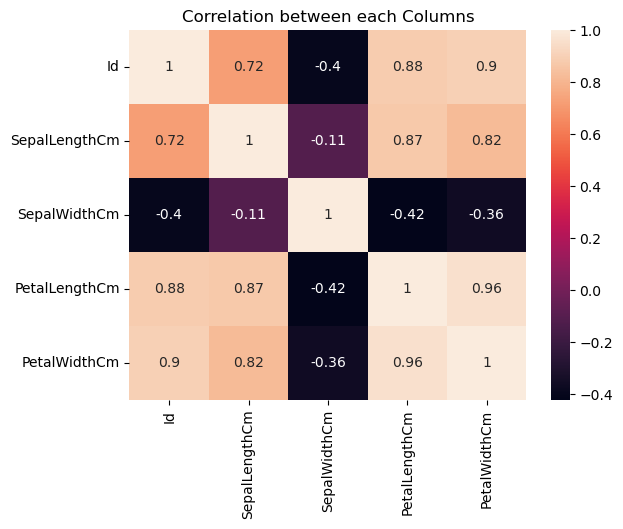

In [9]:
sns.heatmap(df.corr().round(2), annot=True) # make the plot with all values rounded up to 2 decimal places and also all the values will be shown in each cell of the matrix
plt.title('Correlation between each Columns') # title for the plot
plt.show()

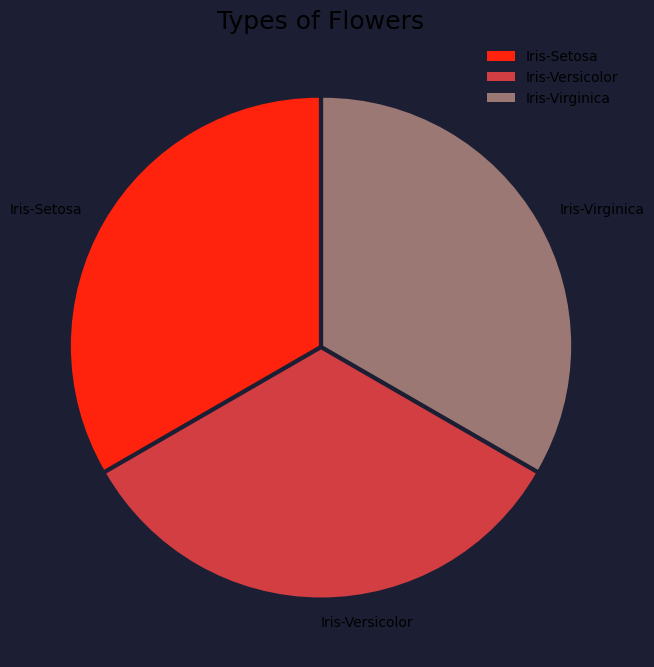

In [10]:
fig = plt.figure() # making object of figure class
color = ['#FF220C', '#D33E43', '#9B7874'] # color for the pie chart
label = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica'] # label for each divisions of the pie chart
plt.pie(df['Species'].value_counts(), colors=color, labels=label, startangle=90, explode=[0.01, 0.01, 0.01]) # making the chart with start angle 90 for plotting. Explode added for visual effect
fig.patch.set_facecolor('#1C1F33') # background color set to darkesh blue
fig.set_size_inches(8, 9) # total size of the chart 8 x 9 inches
plt.legend(frameon=False) # legend shown without any edges
plt.title('Types of Flowers', fontsize=18) # title set with fontsize of 18
plt.show() # plot drawn

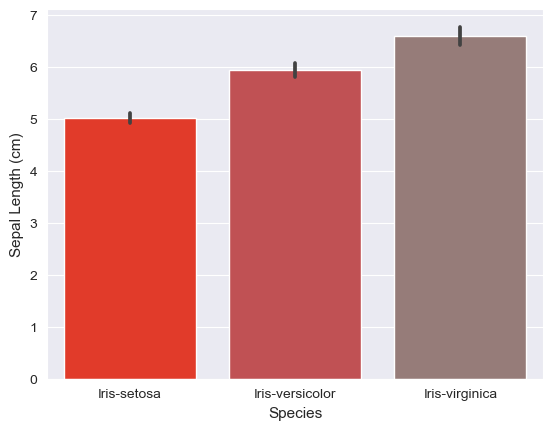

In [11]:
sns.set_style('darkgrid') # background color for the plot
sns.barplot(x='Species', y='SepalLengthCm', data=df, palette=color) # make the box plot with values of 'Species' column on x-axis and values of 'SepalLengthCm' columns on y-axis
plt.xlabel('Species', fontsize=11) # label for x-axis
plt.ylabel('Sepal Length (cm)', fontsize=11) # label for y-axis
plt.show()

Text(0, 0.5, 'Sepal Width (cm)')

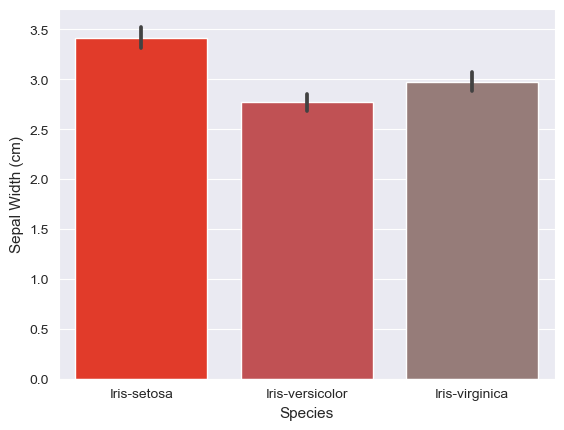

In [12]:
sns.set_style('darkgrid')
sns.barplot(x='Species', y='SepalWidthCm', data=df, palette=color)
plt.xlabel('Species', fontsize=11)
plt.ylabel('Sepal Width (cm)', fontsize=11)

Text(0, 0.5, 'Petal Length (cm)')

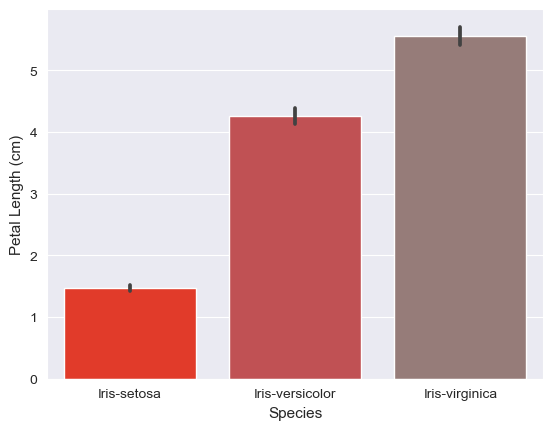

In [13]:
sns.set_style('darkgrid')
sns.barplot(x='Species', y='PetalLengthCm', data=df, palette=color)
plt.xlabel('Species', fontsize=11)
plt.ylabel('Petal Length (cm)', fontsize=11)

Text(0, 0.5, 'Petal Width (cm)')

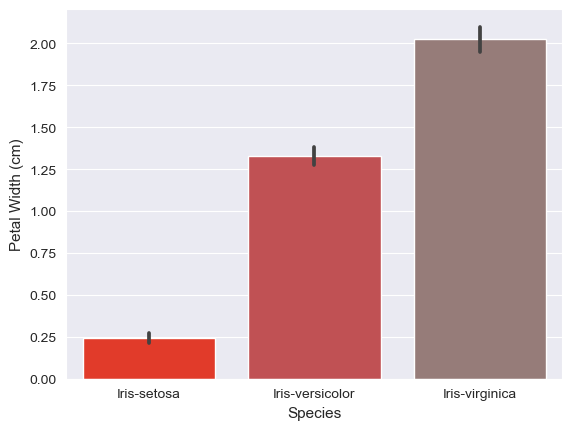

In [14]:
sns.set_style('darkgrid')
sns.barplot(x='Species', y='PetalWidthCm', data=df, palette=color)
plt.xlabel('Species', fontsize=11)
plt.ylabel('Petal Width (cm)', fontsize=11)

### Pre-Processing Data

#### Encoding the Data

In [15]:
# Encoding the target column from string to integers
df['type'] = LabelEncoder().fit_transform(df['Species'])

#### Scaling the Data

In [16]:
# Splitting target column from other columns
x_col = [c for c in df.columns if c not in ['Species', 'type']]
X = df[x_col]
Y = df['type']

In [17]:
# Further splitting the data into training and testing parts
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=42)

In [18]:
# Before training the model, we will need to scale the data to standardize the data
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

### Training the Model

In [19]:
log = LogisticRegression() # Making the object of Logistic Regression
log.fit(X_train, Y_train) # Training the model on test data

LogisticRegression()

### Evaluating the Model

In [20]:
# Evaluating the model through different evaluation metrics
accuracy = accuracy_score(Y_test, log.predict(X_test))
precision = precision_score(Y_test, log.predict(X_test), average='micro')
recall = recall_score(Y_test, log.predict(X_test), average='micro')
f1 = f1_score(Y_test, log.predict(X_test), average='micro')
conf_matrix = confusion_matrix(Y_test, log.predict(X_test))

In [21]:
# Showing the values
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
 [[29  0  0]
 [ 0 23  0]
 [ 0  0 23]]
